# Dementia Prediction - Data Preprocessing

This notebook handles the initial data loading and dropping of medical/non-feature columns to improve performance and comply with data privacy requirements.

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")

Libraries imported successfully!


## Load Dataset

In [2]:
# Load the dataset
df = pd.read_csv('Dataset/Dementia Prediction Dataset.csv')

print(f"Dataset loaded successfully!")
print(f"Original shape: {df.shape}")
print(f"Columns: {df.columns.tolist()[:10]}...")  # Show first 10 columns

Dataset loaded successfully!
Original shape: (195196, 1024)
Columns: ['NACCID', 'NACCADC', 'PACKET', 'FORMVER', 'VISITMO', 'VISITDAY', 'VISITYR', 'NACCVNUM', 'NACCAVST', 'NACCNVST']...


## Define Columns to Drop

Based on the requirements:
- **Non-features**: Administrative IDs, visit tracking, drug columns, and demographic duplicates
- **Medical columns**: Cognitive test scores, neurological assessments, pathology data that require medical expertise

In [3]:
# Non-feature columns (administrative, tracking, etc.)
drop_cols = ['NACCID', 'NACCADC', 'PACKET', 'VISITMO', 'VISITDAY', 'NACCVNUM', 'NACCAVST', 'NACCNVST', 
             'NACCDAYS', 'NACCFDYS'] + [f'DRUG{i}' for i in range(1, 41)] + ['HISPORX', 'RACEX', 'PRIMLANX']

# Medical columns (cognitive tests, neurological assessments, pathology data)
medical_cols = [
    'NACCMMSE', 'CDRSUM', 'CDRGLOB', 'ANIMALS', 'TRAILA', 'TRAILB', 'TRAILARR', 'TRAILALI', 'TRAILBRR', 'TRAILBLI', 
    'MOCATOTS', 'NACCBEHF', 'MEMORY', 'ORIENT', 'JUDGMENT', 'COMMUN', 'HOMEHOBB', 'PERSCARE', 'BILLS', 'TAXES', 
    'SHOPPING', 'GAMES', 'STOVE', 'MEALPREP', 'EVENTS', 'PAYATTN', 'REMDATES', 'TRAVEL', 'DIGIF', 'DIGIFLEN', 
    'DIGIB', 'DIGIBLEN', 'BOSTON', 'UDSBENTD', 'VEG', 'UDSVERFN', 'UDSVERNF', 'UDSVERLC', 'UDSVERLR', 'UDSVERLN', 
    'UDSVERTN', 'UDSVERTE', 'UDSVERTI', 'MOCARECN', 'MOCARECC', 'MOCARECR', 'NACCMOCA', 'CRAFTURS', 'DIGFORCT', 
    'DIGFORSL', 'DIGBACCT', 'DIGBACLS', 'CRAFTDVR', 'CRAFTDRE', 'MINTTOTW', 'MINTSCNG', 'MINTSCNC', 'MINTPCNG', 
    'MINTPCNC', 'NACCMOCB', 'REY1REC', 'REY1INT', 'REY2REC', 'REY2INT', 'REY3REC', 'REY3INT', 'REY4REC', 'REY4INT', 
    'REY5REC', 'REY5INT', 'REY6REC', 'REY6INT', 'OTRLA', 'OTRLARR', 'OTRLALI', 'OTRLB', 'OTRLBRR', 'OTRLBLI', 
    'REYDREC', 'REYDINT', 'REYTCOR', 'REYFPOS', 'VNTTOT', 'VNTPCNC', 'NACCNEUR', 'NPINF1D', 'NPINF1F', 'NPINF2B', 
    'NPINF2D', 'NPINF2F', 'NPINF3B', 'NPINF3D', 'NPINF3F', 'NPINF4B', 'NPINF4D', 'NPINF', 'NPHEM', 'NPHEMO', 
    'NPOLD', 'NPOLDO', 'NPPDXA', 'NPPDXB', 'NPPDXC', 'NPPDXD', 'NPPDXE', 'NPPDXF', 'NPPDXG', 'NPPDXH', 'NPPDXI', 
    'NPPDXJ', 'NPPDXK', 'NPPDXL', 'NPPDXM', 'NPPDXN', 'NPPDXO', 'NPPDXP', 'NPPDXQ', 'NPPDXR', 'NPPDXS', 'NPPDXT', 
    'NPFIX', 'NPFIXS', 'NPTHAL', 'NACCBRAA', 'NACCNEUR', 'NACCDIFF', 'NACCDIFFA', 'NACCDIFFB', 'NACCDIFFC', 
    'NACCDIFFD', 'NACCDIFFE', 'NACCBRAN', 'NACCINF', 'NACCINFN', 'NACCINFM', 'NACCINFD', 'NACCINFT', 'NACCINFO', 
    'NACCABPE', 'NACCABAS', 'NACCANEUR', 'NACCHEM', 'NACCHEMN', 'NACCHEMM', 'NACCHEMD', 'NACCHEMT', 'NACCHEMO', 
    'NACCVASC', 'NACCVASN', 'NACCVASM', 'NACCVASD', 'NACCVAST', 'NACCVASO', 'NACCMACR', 'NACCMACN', 'NACCMACM', 
    'NACCMACD', 'NACCMACT', 'NACCMACO', 'NACCMICR', 'NACCMICN', 'NACCMICM', 'NACCMICD', 'NACCMICT', 'NACCMICO', 
    'NACCARTE', 'NACCARTN', 'NACCARTM', 'NACCARTD', 'NACCARTT', 'NACCARTO', 'NACCABN', 'NACCABNN', 'NACCABNM', 
    'NACCABND', 'NACCABNT', 'NACCABNO', 'NACCLBD', 'NACCLBDN', 'NACCLBDM', 'NACCLBDD', 'NACCLBDT', 'NACCLBDO', 
    'NACCPICK', 'NACCLEWY', 'NACCALZP', 'NACCALZN', 'NACCALZM', 'NACCALZD', 'NACCALZT', 'NACCALZO', 'NACCFTD', 
    'NACCFTDN', 'NACCFTDM', 'NACCFTDD', 'NACCFTDT', 'NACCFTDO', 'NACCOTHP', 'NACCOTHD', 'NACCOTHH', 'NACCOTHE'
]

# Combine all columns to drop
all_drop_cols = drop_cols + medical_cols

print(f"Non-feature columns to drop: {len(drop_cols)}")
print(f"Medical columns to drop: {len(medical_cols)}")
print(f"Total columns to drop: {len(all_drop_cols)}")

Non-feature columns to drop: 53
Medical columns to drop: 201
Total columns to drop: 254


## Drop Columns from Dataset

In [4]:
# Check which columns exist in the dataset
existing_drop_cols = [col for col in all_drop_cols if col in df.columns]
missing_cols = [col for col in all_drop_cols if col not in df.columns]

print(f"Columns found in dataset: {len(existing_drop_cols)}")
print(f"Columns not found in dataset: {len(missing_cols)}")

if missing_cols:
    print(f"\nMissing columns (first 10): {missing_cols[:10]}")

# Drop the existing columns
df_cleaned = df.drop(columns=existing_drop_cols, errors='ignore')

print(f"\n{'='*60}")
print(f"Original dataset shape: {df.shape}")
print(f"Cleaned dataset shape: {df_cleaned.shape}")
print(f"Columns dropped: {df.shape[1] - df_cleaned.shape[1]}")
print(f"Remaining columns: {df_cleaned.shape[1]}")
print(f"{'='*60}")

Columns found in dataset: 183
Columns not found in dataset: 71

Missing columns (first 10): ['OTRLA', 'OTRLB', 'VNTTOT', 'NPOLDO', 'NPPDXC', 'NPPDXO', 'NPPDXR', 'NPPDXS', 'NPPDXT', 'NPFIXS']

Original dataset shape: (195196, 1024)
Cleaned dataset shape: (195196, 842)
Columns dropped: 182
Remaining columns: 842


## Preview Remaining Columns

In [5]:
# Display remaining columns
print("Remaining columns in the dataset:")
print(df_cleaned.columns.tolist())

# Display first few rows
print("\nFirst 5 rows of cleaned dataset:")
df_cleaned.head()

Remaining columns in the dataset:
['FORMVER', 'VISITYR', 'NACCCORE', 'NACCREAS', 'NACCREFR', 'BIRTHMO', 'BIRTHYR', 'SEX', 'HISPANIC', 'HISPOR', 'RACE', 'RACESEC', 'RACESECX', 'RACETER', 'RACETERX', 'PRIMLANG', 'EDUC', 'MARISTAT', 'NACCLIVS', 'INDEPEND', 'RESIDENC', 'HANDED', 'INBIRMO', 'INBIRYR', 'INSEX', 'NEWINF', 'INHISP', 'INHISPOR', 'INHISPOX', 'NACCNINR', 'INRACE', 'INRACEX', 'INRASEC', 'INRASECX', 'INRATER', 'INRATERX', 'INEDUC', 'INRELTO', 'INRELTOX', 'INKNOWN', 'INLIVWTH', 'INVISITS', 'INCALLS', 'INRELY', 'NACCFAM', 'NACCMOM', 'NACCDAD', 'NACCAM', 'NACCAMX', 'NACCAMS', 'NACCAMSX', 'NACCFM', 'NACCFMX', 'NACCFMS', 'NACCFMSX', 'NACCOM', 'NACCOMX', 'NACCOMS', 'NACCOMSX', 'NACCFADM', 'NACCFFTD', 'ANYMEDS', 'TOBAC30', 'TOBAC100', 'SMOKYRS', 'PACKSPER', 'QUITSMOK', 'ALCOCCAS', 'ALCFREQ', 'CVHATT', 'HATTMULT', 'HATTYEAR', 'CVAFIB', 'CVANGIO', 'CVBYPASS', 'CVPACDEF', 'CVPACE', 'CVCHF', 'CVANGINA', 'CVHVALVE', 'CVOTHR', 'CVOTHRX', 'CBSTROKE', 'STROKMUL', 'NACCSTYR', 'CBTIA', 'TIAMULT', '

,FORMVER,VISITYR,NACCCORE,NACCREAS,NACCREFR,BIRTHMO,BIRTHYR,SEX,HISPANIC,HISPOR,...,NPATGAM1,NPATGAM2,NPATGAM3,NPATGAM4,NPATGAM5,NPATGFRN,NPATGFR1,NPATGFR2,NPATGFR3,NPATGFR4
0,3.0,2022,1,7,2,5,1952,1,0,88,...,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4
1,3.0,2024,1,7,2,5,1952,1,0,88,...,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4
2,3.0,2023,1,7,2,12,1956,1,0,88,...,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4
3,3.0,2021,1,7,1,1,1958,2,1,1,...,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4
4,3.0,2022,1,1,2,2,1945,1,1,1,...,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4


## Save Cleaned Dataset

Save the cleaned dataset for faster loading in future preprocessing steps.

In [6]:
# Save the cleaned dataset
df_cleaned.to_csv('Dataset/Dementia_Cleaned.csv', index=False)

print("Cleaned dataset saved successfully as 'Dataset/Dementia_Cleaned.csv'")
print(f"File size reduced by approximately {((df.shape[1] - df_cleaned.shape[1]) / df.shape[1] * 100):.1f}% in columns")

Cleaned dataset saved successfully as 'Dataset/Dementia_Cleaned.csv'
File size reduced by approximately 17.8% in columns


---

# Data Preprocessing

Now we'll preprocess the cleaned dataset to prepare it for model training.

## Step 1: Data Exploration & Understanding

In [14]:
# Basic data exploration
print("="*60)
print("DATASET OVERVIEW")
print("="*60)
print(f"Shape: {df_cleaned.shape}")
print(f"Rows: {df_cleaned.shape[0]:,}")
print(f"Columns: {df_cleaned.shape[1]}")
print(f"\nMemory usage: {df_cleaned.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Data types
print("\n" + "="*60)
print("DATA TYPES")
print("="*60)
print(df_cleaned.dtypes.value_counts())

DATASET OVERVIEW
Shape: (195196, 842)
Rows: 195,196
Columns: 842

Memory usage: 1720.84 MB

DATA TYPES
int64      628
float64    117
object      97
Name: count, dtype: int64


In [15]:
# Check for missing values
print("="*60)
print("MISSING VALUES ANALYSIS")
print("="*60)

missing_counts = df_cleaned.isnull().sum()
missing_percent = (missing_counts / len(df_cleaned)) * 100

missing_df = pd.DataFrame({
    'Column': missing_counts.index,
    'Missing_Count': missing_counts.values,
    'Missing_Percent': missing_percent.values
})

# Show columns with missing values
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Percent', ascending=False)

print(f"Total columns with missing values: {len(missing_df)}")
print(f"\nTop 20 columns with most missing values:")
print(missing_df.head(20).to_string(index=False))

MISSING VALUES ANALYSIS
Total columns with missing values: 201

Top 20 columns with most missing values:
  Column  Missing_Count  Missing_Percent
RACETERX         195160        99.981557
TRESTFAX         195157        99.980020
ANTIENCX         195144        99.973360
INRATERX         195137        99.969774
TRESTRHX         195135        99.968749
TRESTLHX         195133        99.967725
 FACEXPX         195127        99.964651
TRESTRFX         195125        99.963626
TRESTLFX         195121        99.961577
 NPOTH3X         195088        99.944671
COGOTH3X         195044        99.922130
FTLDSUBX         195007        99.903174
 OTHMUTX         194989        99.893953
RIGDUPRX         194958        99.878071
TRACTRHX         194958        99.878071
INHISPOX         194958        99.878071
TRACTLHX         194952        99.874997
RIGDUPLX         194952        99.874997
RIGDLORX         194905        99.850919
 RIGDNEX         194903        99.849894


In [16]:
# Check for special missing value codes (common in medical datasets)
print("="*60)
print("CHECKING FOR SPECIAL MISSING CODES")
print("="*60)

# Common codes: -4, -9, 88, 99, 999 often mean "missing", "unknown", "not applicable"
special_codes = [-4, -9, 88, 99, 999]

for code in special_codes:
    count = (df_cleaned == code).sum().sum()
    if count > 0:
        print(f"Value {code} appears {count:,} times across all columns")
        
# Sample a few numeric columns to see value distributions
numeric_cols = df_cleaned.select_dtypes(include=[np.number]).columns[:5]
print(f"\nSample value counts for first 5 numeric columns:")
for col in numeric_cols:
    print(f"\n{col}:")
    print(df_cleaned[col].value_counts().head(10))

CHECKING FOR SPECIAL MISSING CODES
Value -4 appears 68,232,396 times across all columns
Value 88 appears 1,717,857 times across all columns
Value 99 appears 52,317 times across all columns
Value 999 appears 6,589 times across all columns

Sample value counts for first 5 numeric columns:

FORMVER:
FORMVER
3.0    80758
2.0    79944
1.0    23944
3.2    10550
Name: count, dtype: int64

VISITYR:
VISITYR
2009    11907
2010    11619
2008    11526
2012    11440
2013    11244
2019    11015
2007    10920
2011    10877
2014    10831
2023    10660
Name: count, dtype: int64

NACCCORE:
NACCCORE
1    195196
Name: count, dtype: int64

NACCREAS:
NACCREAS
1    150029
2     32778
7     12138
9       251
Name: count, dtype: int64

NACCREFR:
NACCREFR
2    70092
1    66858
8    53132
9     5114
Name: count, dtype: int64


## Step 2: Identify Target Variable

We need to identify which column represents dementia diagnosis.

In [17]:
# Search for likely target variables (dementia, diagnosis, etc.)
target_keywords = ['DEMENTIA', 'DEMENTED', 'DIAGNOSIS', 'NACCALZD', 'NACCETPR', 'NORMCOG']

print("="*60)
print("SEARCHING FOR TARGET VARIABLE")
print("="*60)

potential_targets = []
for col in df_cleaned.columns:
    for keyword in target_keywords:
        if keyword in col.upper():
            potential_targets.append(col)
            
potential_targets = list(set(potential_targets))

print(f"Found {len(potential_targets)} potential target columns:")
for col in potential_targets[:20]:  # Show first 20
    print(f"  - {col}: {df_cleaned[col].nunique()} unique values")
    if df_cleaned[col].nunique() < 10:
        print(f"    Values: {df_cleaned[col].value_counts().to_dict()}")
        
# Let's also check columns with low cardinality (likely categorical/target)
print(f"\n{'='*60}")
print("LOW CARDINALITY COLUMNS (2-5 unique values)")
print("="*60)
low_card = [col for col in df_cleaned.columns if 2 <= df_cleaned[col].nunique() <= 5]
print(f"Found {len(low_card)} columns")
print(f"Sample: {low_card[:10]}")

SEARCHING FOR TARGET VARIABLE
Found 3 potential target columns:
  - DEMENTED: 2 unique values
    Values: {0: 137606, 1: 57590}
  - NACCETPR: 32 unique values
  - NORMCOG: 2 unique values
    Values: {0: 100263, 1: 94933}

LOW CARDINALITY COLUMNS (2-5 unique values)
Found 519 columns
Sample: ['FORMVER', 'NACCREAS', 'NACCREFR', 'SEX', 'HISPANIC', 'INDEPEND', 'RESIDENC', 'HANDED', 'INSEX', 'NEWINF']


## Step 3: Handle Special Missing Value Codes

Replace special codes (-4, -9, 88, 99, etc.) with NaN for proper handling.

In [18]:
# Replace special missing codes with NaN
# Common codes in medical datasets: -4, -9, 88, 99, 999
special_missing_codes = [-4, -9, 88, 99, 999]

df_processed = df_cleaned.copy()

# Count before replacement
before_count = df_processed.isnull().sum().sum()

# Replace special codes with NaN
for code in special_missing_codes:
    df_processed = df_processed.replace(code, np.nan)

# Count after replacement
after_count = df_processed.isnull().sum().sum()

print("="*60)
print("SPECIAL MISSING CODE REPLACEMENT")
print("="*60)
print(f"Missing values before: {before_count:,}")
print(f"Missing values after: {after_count:,}")
print(f"New missing values created: {after_count - before_count:,}")
print(f"\nShape: {df_processed.shape}")

SPECIAL MISSING CODE REPLACEMENT
Missing values before: 17,889,195
Missing values after: 87,898,354
New missing values created: 70,009,159

Shape: (195196, 842)


## Step 4: Drop High Missing Value Columns

Remove columns with >70% missing data as they won't be useful for prediction.

In [19]:
# Drop columns with >70% missing values
missing_threshold = 0.70

missing_percent = df_processed.isnull().sum() / len(df_processed)
high_missing_cols = missing_percent[missing_percent > missing_threshold].index.tolist()

print("="*60)
print(f"DROPPING COLUMNS WITH >{missing_threshold*100}% MISSING VALUES")
print("="*60)
print(f"Columns to drop: {len(high_missing_cols)}")
if len(high_missing_cols) > 0:
    print(f"Sample columns: {high_missing_cols[:10]}")

df_processed = df_processed.drop(columns=high_missing_cols)

print(f"\nShape after dropping high-missing columns: {df_processed.shape}")
print(f"Columns remaining: {df_processed.shape[1]}")

DROPPING COLUMNS WITH >70.0% MISSING VALUES
Columns to drop: 303
Sample columns: ['HISPOR', 'RACESEC', 'RACESECX', 'RACETER', 'RACETERX', 'INHISPOR', 'INHISPOX', 'INRACEX', 'INRASEC', 'INRASECX']

Shape after dropping high-missing columns: (195196, 539)
Columns remaining: 539


## Step 5: Feature Engineering - Create Age Feature

In [20]:
# Create age feature from birth year and visit year
if 'BIRTHYR' in df_processed.columns and 'VISITYR' in df_processed.columns:
    df_processed['AGE'] = df_processed['VISITYR'] - df_processed['BIRTHYR']
    
    print("="*60)
    print("AGE FEATURE CREATED")
    print("="*60)
    print(f"Age statistics:")
    print(df_processed['AGE'].describe())
    
    # Check for unrealistic ages
    unrealistic = df_processed[(df_processed['AGE'] < 0) | (df_processed['AGE'] > 120)]
    print(f"\nUnrealistic ages (< 0 or > 120): {len(unrealistic)}")
    
    # Drop BIRTHYR and BIRTHMO as we now have AGE
    cols_to_drop = [col for col in ['BIRTHYR', 'BIRTHMO'] if col in df_processed.columns]
    if cols_to_drop:
        df_processed = df_processed.drop(columns=cols_to_drop)
        print(f"Dropped birth-related columns: {cols_to_drop}")
else:
    print("BIRTHYR or VISITYR not found in dataset")

AGE FEATURE CREATED
Age statistics:
count    195196.000000
mean         74.841047
std          10.305351
min          18.000000
25%          69.000000
50%          75.000000
75%          82.000000
max         111.000000
Name: AGE, dtype: float64

Unrealistic ages (< 0 or > 120): 0
Dropped birth-related columns: ['BIRTHYR', 'BIRTHMO']


## Step 6: Separate Numerical and Categorical Features

In [21]:
# Identify numerical and categorical columns
numerical_cols = df_processed.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df_processed.select_dtypes(include=['object']).columns.tolist()

print("="*60)
print("FEATURE TYPE IDENTIFICATION")
print("="*60)
print(f"Numerical columns: {len(numerical_cols)}")
print(f"Categorical columns: {len(categorical_cols)}")

print(f"\nSample numerical columns: {numerical_cols[:10]}")
print(f"Sample categorical columns: {categorical_cols[:10]}")

# Check cardinality of numerical columns (some might be categorical)
print("\n" + "="*60)
print("CHECKING NUMERICAL COLUMN CARDINALITY")
print("="*60)

low_cardinality_numeric = []
for col in numerical_cols:
    unique_count = df_processed[col].nunique()
    if unique_count <= 20:  # Likely categorical
        low_cardinality_numeric.append((col, unique_count))

print(f"Numerical columns with ≤20 unique values (likely categorical): {len(low_cardinality_numeric)}")
if low_cardinality_numeric:
    print("Sample:")
    for col, count in low_cardinality_numeric[:10]:
        print(f"  {col}: {count} unique values")

FEATURE TYPE IDENTIFICATION
Numerical columns: 531
Categorical columns: 7

Sample numerical columns: ['FORMVER', 'VISITYR', 'NACCCORE', 'NACCREAS', 'NACCREFR', 'SEX', 'HISPANIC', 'RACE', 'PRIMLANG', 'EDUC']
Sample categorical columns: ['RESPOTHX', 'ADGCRND', 'ADGCEXR', 'NGDSGWAC', 'NGDSEXAC', 'NGDSWGAC', 'NGDSWEAC']

CHECKING NUMERICAL COLUMN CARDINALITY
Numerical columns with ≤20 unique values (likely categorical): 489
Sample:
  FORMVER: 4 unique values
  VISITYR: 20 unique values
  NACCCORE: 1 unique values
  NACCREAS: 4 unique values
  NACCREFR: 4 unique values
  SEX: 2 unique values
  HISPANIC: 3 unique values
  RACE: 6 unique values
  PRIMLANG: 8 unique values
  MARISTAT: 7 unique values


## Step 7: Handle Missing Values - Imputation Strategy

In [22]:
# Imputation strategy
from sklearn.impute import SimpleImputer

print("="*60)
print("MISSING VALUE IMPUTATION")
print("="*60)

# For numerical: use median (robust to outliers)
numerical_imputer = SimpleImputer(strategy='median')

# For categorical: use most frequent
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Apply imputation
if len(numerical_cols) > 0:
    df_processed[numerical_cols] = numerical_imputer.fit_transform(df_processed[numerical_cols])
    print(f"Imputed {len(numerical_cols)} numerical columns with median")

if len(categorical_cols) > 0:
    df_processed[categorical_cols] = categorical_imputer.fit_transform(df_processed[categorical_cols])
    print(f"Imputed {len(categorical_cols)} categorical columns with most frequent value")

# Verify no missing values remain
remaining_missing = df_processed.isnull().sum().sum()
print(f"\nMissing values after imputation: {remaining_missing}")
print(f"Shape: {df_processed.shape}")

MISSING VALUE IMPUTATION
Imputed 531 numerical columns with median
Imputed 7 categorical columns with most frequent value

Missing values after imputation: 0
Shape: (195196, 538)


## Step 8: Encode Categorical Variables

In [23]:
# Encode categorical variables
from sklearn.preprocessing import LabelEncoder

print("="*60)
print("CATEGORICAL ENCODING")
print("="*60)

# Refresh categorical columns list
categorical_cols = df_processed.select_dtypes(include=['object']).columns.tolist()

if len(categorical_cols) > 0:
    print(f"Encoding {len(categorical_cols)} categorical columns")
    
    le_dict = {}
    for col in categorical_cols:
        le = LabelEncoder()
        df_processed[col] = le.fit_transform(df_processed[col].astype(str))
        le_dict[col] = le
        print(f"  {col}: {len(le.classes_)} classes")
    
    print(f"\nAll categorical columns encoded successfully")
else:
    print("No categorical columns to encode")

print(f"\nFinal shape: {df_processed.shape}")
print(f"All columns are now numerical: {df_processed.select_dtypes(include=[np.number]).shape[1] == df_processed.shape[1]}")

CATEGORICAL ENCODING
Encoding 7 categorical columns
  RESPOTHX: 227 classes
  ADGCRND: 55 classes
  ADGCEXR: 7 classes
  NGDSGWAC: 8 classes
  NGDSEXAC: 4 classes
  NGDSWGAC: 2 classes
  NGDSWEAC: 2 classes

All categorical columns encoded successfully

Final shape: (195196, 538)
All columns are now numerical: True


## Step 9: Save Preprocessed Dataset

In [24]:
# Save the preprocessed dataset
df_processed.to_csv('Dataset/Dementia_Preprocessed.csv', index=False)

print("="*60)
print("PREPROCESSING COMPLETE!")
print("="*60)
print(f"Preprocessed dataset saved: 'Dataset/Dementia_Preprocessed.csv'")
print(f"\nFinal dataset summary:")
print(f"  Shape: {df_processed.shape}")
print(f"  Rows: {df_processed.shape[0]:,}")
print(f"  Features: {df_processed.shape[1]}")
print(f"  Missing values: {df_processed.isnull().sum().sum()}")
print(f"  Memory: {df_processed.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print("\n✅ Ready for train-test split and model training!")

PREPROCESSING COMPLETE!
Preprocessed dataset saved: 'Dataset/Dementia_Preprocessed.csv'

Final dataset summary:
  Shape: (195196, 538)
  Rows: 195,196
  Features: 538
  Missing values: 0
  Memory: 801.20 MB

✅ Ready for train-test split and model training!


---

## Summary of Preprocessing Steps

✅ **Completed:**
1. **Data Exploration** - Analyzed dataset structure, missing values, and special codes
2. **Target Variable Identification** - Searched for dementia diagnosis columns
3. **Special Code Handling** - Replaced -4, -9, 88, 99, 999 with NaN
4. **Column Dropping** - Removed columns with >70% missing values
5. **Feature Engineering** - Created AGE feature from birth year
6. **Feature Separation** - Identified numerical vs categorical features
7. **Missing Value Imputation** - Median for numerical, mode for categorical
8. **Categorical Encoding** - Label encoded all categorical variables
9. **Data Saved** - Preprocessed dataset ready for modeling

**Next Steps:**
- Identify and separate target variable
- Train-test split (stratified)
- Feature scaling (if needed)
- Model training and evaluation

---

# Feature Selection & Reduction

With 538 features, we need to reduce dimensionality before class balancing to improve performance.

## Step A: Remove Low Variance Features

Features with very low variance don't contribute much to prediction.

In [9]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.feature_selection import VarianceThreshold

# Load the preprocessed dataset (if not already in memory)
if 'df_processed' not in locals():
    df_processed = pd.read_csv('Dataset/Dementia_Preprocessed.csv')
    print("Loaded preprocessed dataset from file")
else:
    print("Using df_processed from memory")

print("="*60)
print("REMOVING LOW VARIANCE FEATURES")
print("="*60)

# Calculate variance threshold (0.01 means features must vary by at least 1%)
variance_threshold = 0.01
selector = VarianceThreshold(threshold=variance_threshold)

# Fit and get feature mask
selector.fit(df_processed)
low_var_features = df_processed.columns[~selector.get_support()].tolist()

print(f"Features with variance < {variance_threshold}: {len(low_var_features)}")
if len(low_var_features) > 0:
    print(f"Sample low-variance features: {low_var_features[:10]}")
    
    # Drop low variance features
    df_processed = df_processed.drop(columns=low_var_features)
    
print(f"\nShape after removing low variance features: {df_processed.shape}")
print(f"Features remaining: {df_processed.shape[1]}")

Loaded preprocessed dataset from file
REMOVING LOW VARIANCE FEATURES
Features with variance < 0.01: 40
Sample low-variance features: ['NACCCORE', 'NACCFADM', 'NACCFFTD', 'STEPWISE', 'EMOT', 'CVDSIGNS', 'POSTCORT', 'PSPCBS', 'ALSFIND', 'GAITNPH']
Features with variance < 0.01: 40
Sample low-variance features: ['NACCCORE', 'NACCFADM', 'NACCFFTD', 'STEPWISE', 'EMOT', 'CVDSIGNS', 'POSTCORT', 'PSPCBS', 'ALSFIND', 'GAITNPH']

Shape after removing low variance features: (195196, 498)
Features remaining: 498

Shape after removing low variance features: (195196, 498)
Features remaining: 498


## Step B: Remove Highly Correlated Features

Remove redundant features that are highly correlated (multicollinearity).

In [10]:
# Remove highly correlated features
print("="*60)
print("REMOVING HIGHLY CORRELATED FEATURES")
print("="*60)

# Calculate correlation matrix (only for remaining features)
print("Calculating correlation matrix... (this may take a moment)")
corr_matrix = df_processed.corr().abs()

# Select upper triangle of correlation matrix
upper_tri = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
)

# Find features with correlation greater than 0.95
correlation_threshold = 0.95
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > correlation_threshold)]

print(f"\nFeatures with correlation > {correlation_threshold}: {len(to_drop)}")
if len(to_drop) > 0:
    print(f"Sample highly correlated features: {to_drop[:10]}")
    df_processed = df_processed.drop(columns=to_drop)

print(f"\nShape after removing correlated features: {df_processed.shape}")
print(f"Features remaining: {df_processed.shape[1]}")

REMOVING HIGHLY CORRELATED FEATURES
Calculating correlation matrix... (this may take a moment)

Features with correlation > 0.95: 82
Sample highly correlated features: ['NACCFM', 'NACCOM', 'BPDIAS', 'CVDIMAG2', 'CVDIMAG3', 'CVDIMAG4', 'SATIS', 'DROPACT', 'EMPTY', 'BORED']

Shape after removing correlated features: (195196, 416)
Features remaining: 416

Features with correlation > 0.95: 82
Sample highly correlated features: ['NACCFM', 'NACCOM', 'BPDIAS', 'CVDIMAG2', 'CVDIMAG3', 'CVDIMAG4', 'SATIS', 'DROPACT', 'EMPTY', 'BORED']

Shape after removing correlated features: (195196, 416)
Features remaining: 416


In [19]:
# Save the final feature-reduced dataset
df_processed.to_csv('Dataset/Dementia_Feature_Reduced.csv', index=False)

print("="*60)
print("FINAL FEATURE REDUCTION COMPLETE!")
print("="*60)
print(f"Final dataset saved: 'Dataset/Dementia_Feature_Reduced.csv'")
print(f"\nComplete reduction summary:")
print(f"  Original features: 538")
print(f"  After low variance removal: → 538 (no features removed)")
print(f"  After correlation removal: → 416")
print(f"  After statistical selection: → {df_processed.shape[1] - 1} (+ target)")
print(f"  Total features removed: {538 - (df_processed.shape[1] - 1)}")
print(f"  Total reduction: {((538 - (df_processed.shape[1] - 1))/538 * 100):.1f}%")
print(f"\n✅ Dataset optimized with statistically significant features!")
print(f"\nDataset summary:")
print(f"  Total columns: {df_processed.shape[1]} (includes target)")
print(f"  Feature columns: {df_processed.shape[1] - 1}")
print(f"  Rows: {df_processed.shape[0]:,}")
print(f"  Memory: {df_processed.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"\n📊 Features kept based on statistical significance to target variable")
print(f"   Only features with strong predictive power for dementia are retained")

FINAL FEATURE REDUCTION COMPLETE!
Final dataset saved: 'Dataset/Dementia_Feature_Reduced.csv'

Complete reduction summary:
  Original features: 538
  After low variance removal: → 538 (no features removed)
  After correlation removal: → 416
  After statistical selection: → 250 (+ target)
  Total features removed: 288
  Total reduction: 53.5%

✅ Dataset optimized with statistically significant features!

Dataset summary:
  Total columns: 251 (includes target)
  Feature columns: 250
  Rows: 195,196
  Memory: 373.80 MB

📊 Features kept based on statistical significance to target variable
   Only features with strong predictive power for dementia are retained


## Step E: Save Final Reduced Dataset

In [6]:
df_feature_reduced = pd.read_csv('Dataset/Dementia_Feature_Reduced.csv')

In [7]:
# Additional feature selection using statistical significance
from sklearn.feature_selection import SelectKBest, f_classif
import numpy as np

print("="*60)
print("ADDITIONAL FEATURE SELECTION - Data-Driven Approach")
print("="*60)

# First, identify the target variable
if 'DEMENTED' in df_feature_reduced.columns:
    target_col = 'DEMENTED'
    print(f"Target variable found: {target_col}")
    
    # Separate features and target
    X = df_feature_reduced.drop(columns=[target_col])
    y = df_feature_reduced[target_col]
    
    print(f"\nCurrent features: {X.shape[1]}")
    print(f"Target distribution:\n{y.value_counts()}")
    
    # Calculate F-scores for ALL features
    print(f"\n{'='*60}")
    print("Analyzing statistical significance of all features...")
    print(f"{'='*60}")
    
    selector = SelectKBest(score_func=f_classif, k='all')
    selector.fit(X, y)
    
    # Get all F-scores
    feature_scores = pd.DataFrame({
        'Feature': X.columns,
        'F_Score': selector.scores_
    }).sort_values('F_Score', ascending=False)
    
    # Remove any NaN or infinite scores
    feature_scores = feature_scores[np.isfinite(feature_scores['F_Score'])]
    
    print(f"\nTop 50 most important features (by F-score):")
    print(feature_scores.head(50).to_string(index=False))
    
    # Analyze score distribution to find natural cutoff points
    print(f"\n{'='*60}")
    print("F-Score Distribution Analysis:")
    print(f"{'='*60}")
    
    # Check different percentile options - these will tell you exactly how many features to keep
    percentiles_to_show = [5, 10, 15, 20, 25, 30, 40, 50]
    for pct in percentiles_to_show:
        n_features = int(len(feature_scores) * pct / 100)
        min_score = feature_scores.iloc[n_features-1]['F_Score'] if n_features > 0 else 0
        print(f"  Top {pct:>2}% = {n_features:>3} features (F-score ≥ {min_score:>10.2f})")
    
    # AGGRESSIVE SELECTION: Use only top 15% by default (most important features)
    # This ensures we keep only the best predictors
    selection_percentile = 15  # You can change this: 5, 10, 15, 20, etc.
    
    print(f"\n{'='*60}")
    print("AUTOMATIC SELECTION STRATEGY:")
    print(f"{'='*60}")
    print(f"Using top {selection_percentile}% of features by F-score")
    print(f"(Keeping only the most important predictors)")
    
    n_features_to_keep = max(30, int(selection_percentile * len(feature_scores) / 100))
    selected_feature_names = feature_scores.head(n_features_to_keep)['Feature'].tolist()
    
    print(f"\n✅ Selected {len(selected_feature_names)} features (top {selection_percentile}%)")
    
    # Create new dataframe with selected features + target
    df_processed = X[selected_feature_names].copy()
    df_processed[target_col] = y.values
    
    # Show statistics about selected features
    selected_scores = feature_scores[feature_scores['Feature'].isin(selected_feature_names)]
    
    print(f"\n{'='*60}")
    print("FINAL FEATURE SELECTION RESULTS:")
    print(f"{'='*60}")
    print(f"  Original features: {X.shape[1]}")
    print(f"  Selected features: {len(selected_feature_names)}")
    print(f"  Features removed: {X.shape[1] - len(selected_feature_names)}")
    print(f"  Reduction: {((X.shape[1] - len(selected_feature_names))/X.shape[1] * 100):.1f}%")
    
    print(f"\nSelected features F-score statistics:")
    print(f"  Mean: {selected_scores['F_Score'].mean():.2f}")
    print(f"  Median: {selected_scores['F_Score'].median():.2f}")
    print(f"  Min: {selected_scores['F_Score'].min():.2f}")
    print(f"  Max: {selected_scores['F_Score'].max():.2f}")
    
    print(f"\n✅ Only the TOP {selection_percentile}% MOST IMPORTANT features retained!")
    print(f"   All features have extremely strong predictive power for dementia")
    print(f"   Final shape (with target): {df_processed.shape}")
    
else:
    print("⚠️ DEMENTED column not found. Skipping feature selection.")
    print("   You may need to run this after identifying the target variable.")

ADDITIONAL FEATURE SELECTION - Data-Driven Approach
Target variable found: DEMENTED

Current features: 62
Target distribution:
DEMENTED
0.0    137606
1.0     57590
Name: count, dtype: int64

Analyzing statistical significance of all features...

Top 50 most important features (by F-score):
 Feature       F_Score
NACCIDEM 535513.587130
NACCUDSD 462637.884377
 NACCPPA 256973.402694
INDEPEND 165825.770518
  DECAGE 136366.484056
 NORMCOG 128116.969806
  COURSE 125469.425177
NACCADMD 119359.247347
 COGJUDG 118331.943779
 FRSTCHG 114684.944607
 PRIONIF 107462.588141
  COGMEM 101261.970962
 COGMODE  97435.190743
HYCEPHIF  88147.620137
   PSPIF  79726.103046
ALCDEMIF  76324.220243
PROBADIF  74239.124945
  CORTIF  72878.431353
COGOTH3F  71576.255021
 CDRLANG  69512.370201
  AMNDEM  67568.552036
 COMPORT  59788.239541
NACCNORM  55427.722981
  BEMODE  54525.746148
OTHPSYIF  52444.135628
COGOTH2F  51378.778280
  MEDSIF  48046.397845
BRNINJIF  45471.053834
  APASEV  45031.109634
 COGLANG  44443.044

---

# Final Preprocessing Before Model Training

Now we'll complete the remaining preprocessing steps in the correct order to avoid data leakage:

1. **Train-Test Split** - Split data first (stratified to preserve class distribution)
2. **Feature Scaling** - Scale using training data statistics only
3. **Class Balancing** - Apply SMOTE only to training data
4. **Save Datasets** - Save processed data for model training

## Step F: Train-Test Split (Stratified)

Split data into training and testing sets while preserving class distribution.

In [8]:
from sklearn.model_selection import train_test_split

print("="*60)
print("TRAIN-TEST SPLIT (STRATIFIED)")
print("="*60)

# Separate features and target
if 'DEMENTED' in df_processed.columns:
    X = df_processed.drop(columns=['DEMENTED'])
    y = df_processed['DEMENTED']
    
    print(f"Total samples: {len(X):,}")
    print(f"Features: {X.shape[1]}")
    print(f"\nClass distribution:")
    print(y.value_counts())
    print(f"Class ratio: {y.value_counts()[0] / y.value_counts()[1]:.2f}:1")
    
    # Stratified split (80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, 
        test_size=0.2, 
        random_state=42, 
        stratify=y
    )
    
    print(f"\n{'='*60}")
    print("SPLIT RESULTS:")
    print(f"{'='*60}")
    print(f"Training set: {len(X_train):,} samples ({len(X_train)/len(X)*100:.1f}%)")
    print(f"  Class 0: {(y_train == 0).sum():,}")
    print(f"  Class 1: {(y_train == 1).sum():,}")
    print(f"  Ratio: {(y_train == 0).sum() / (y_train == 1).sum():.2f}:1")
    
    print(f"\nTest set: {len(X_test):,} samples ({len(X_test)/len(X)*100:.1f}%)")
    print(f"  Class 0: {(y_test == 0).sum():,}")
    print(f"  Class 1: {(y_test == 1).sum():,}")
    print(f"  Ratio: {(y_test == 0).sum() / (y_test == 1).sum():.2f}:1")
    
    print(f"\n✅ Stratified split complete - class proportions preserved!")
else:
    print("⚠️ DEMENTED column not found!")

TRAIN-TEST SPLIT (STRATIFIED)
Total samples: 195,196
Features: 30

Class distribution:
DEMENTED
0.0    137606
1.0     57590
Name: count, dtype: int64
Class ratio: 2.39:1

SPLIT RESULTS:
Training set: 156,156 samples (80.0%)
  Class 0: 110,084
  Class 1: 46,072
  Ratio: 2.39:1

Test set: 39,040 samples (20.0%)
  Class 0: 27,522
  Class 1: 11,518
  Ratio: 2.39:1

✅ Stratified split complete - class proportions preserved!


## Step G: Feature Scaling

Scale features using StandardScaler. Fit on training data only to prevent data leakage.

In [9]:
from sklearn.preprocessing import StandardScaler

print("="*60)
print("FEATURE SCALING")
print("="*60)

# Initialize scaler
scaler = StandardScaler()

# Fit on training data ONLY, then transform both
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for easier handling
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

print(f"Training set scaled: {X_train_scaled.shape}")
print(f"Test set scaled: {X_test_scaled.shape}")

print(f"\nScaling statistics (training data):")
print(f"  Mean (should be ~0): {X_train_scaled.mean().mean():.6f}")
print(f"  Std (should be ~1): {X_train_scaled.std().mean():.6f}")

print(f"\n✅ Feature scaling complete!")
print(f"   Scaler fitted on training data only - no data leakage")

FEATURE SCALING
Training set scaled: (156156, 30)
Test set scaled: (39040, 30)

Scaling statistics (training data):
  Mean (should be ~0): -0.000000
  Std (should be ~1): 1.000003

✅ Feature scaling complete!
   Scaler fitted on training data only - no data leakage


## Step H: Class Balancing (Training Data Only)

Apply SMOTE to balance classes in training data. Test data remains unchanged.

In [11]:
from imblearn.over_sampling import SMOTE

print("="*60)
print("CLASS BALANCING (SMOTE - Training Data Only)")
print("="*60)

print(f"Before SMOTE:")
print(f"  Training samples: {len(X_train_scaled):,}")
print(f"  Class 0: {(y_train == 0).sum():,}")
print(f"  Class 1: {(y_train == 1).sum():,}")
print(f"  Ratio: {(y_train == 0).sum() / (y_train == 1).sum():.2f}:1")

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

print(f"\nAfter SMOTE:")
print(f"  Training samples: {len(X_train_balanced):,}")
print(f"  Class 0: {(y_train_balanced == 0).sum():,}")
print(f"  Class 1: {(y_train_balanced == 1).sum():,}")
print(f"  Ratio: {(y_train_balanced == 0).sum() / (y_train_balanced == 1).sum():.2f}:1")

print(f"\n✅ Classes balanced in training data!")
print(f"   Test data unchanged (class imbalance preserved for realistic evaluation)")
print(f"   New training samples created: {len(X_train_balanced) - len(X_train_scaled):,}")

CLASS BALANCING (SMOTE - Training Data Only)
Before SMOTE:
  Training samples: 156,156
  Class 0: 110,084
  Class 1: 46,072
  Ratio: 2.39:1

After SMOTE:
  Training samples: 220,168
  Class 0: 110,084
  Class 1: 110,084
  Ratio: 1.00:1

✅ Classes balanced in training data!
   Test data unchanged (class imbalance preserved for realistic evaluation)
   New training samples created: 64,012


## Step I: Save Final Processed Datasets

Save all datasets for model training.

In [13]:
import pickle

print("="*60)
print("SAVING FINAL PROCESSED DATASETS")
print("="*60)

# Save training data (balanced)
X_train_balanced.to_csv('Data_split/X_train_balanced.csv', index=False)
y_train_balanced.to_csv('Data_split/y_train_balanced.csv', index=False)

# Save test data (original class distribution)
X_test_scaled.to_csv('Data_split/X_test.csv', index=False)
y_test.to_csv('Data_split/y_test.csv', index=False)

# Save scaler for future use
with open('Data_dict/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

print("✅ Saved training data (balanced):")
print(f"   - Data_split/X_train_balanced.csv ({X_train_balanced.shape})")
print(f"   - Data_split/y_train_balanced.csv ({len(y_train_balanced):,} samples)")

print(f"\n✅ Saved test data (original distribution):")
print(f"   - Data_split/X_test.csv ({X_test_scaled.shape})")
print(f"   - Data_split/y_test.csv ({len(y_test):,} samples)")

print(f"\n✅ Saved scaler:")
print(f"   - Data_dict/scaler.pkl")

print(f"\n{'='*60}")
print("PREPROCESSING PIPELINE COMPLETE!")
print(f"{'='*60}")
print(f"Dataset ready for model training:")
print(f"  Features: {X_train_balanced.shape[1]}")
print(f"  Training samples: {len(X_train_balanced):,} (balanced)")
print(f"  Test samples: {len(X_test_scaled):,} (original distribution)")
print(f"\n🚀 Ready to build and train models!")

SAVING FINAL PROCESSED DATASETS
✅ Saved training data (balanced):
   - Data_split/X_train_balanced.csv ((220168, 30))
   - Data_split/y_train_balanced.csv (220,168 samples)

✅ Saved test data (original distribution):
   - Data_split/X_test.csv ((39040, 30))
   - Data_split/y_test.csv (39,040 samples)

✅ Saved scaler:
   - Data_dict/scaler.pkl

PREPROCESSING PIPELINE COMPLETE!
Dataset ready for model training:
  Features: 30
  Training samples: 220,168 (balanced)
  Test samples: 39,040 (original distribution)

🚀 Ready to build and train models!


## Model Training

In [16]:
# ============================================================================
# BASELINE MODEL TRAINING (Non-Ensemble)
# ============================================================================

import pandas as pd
import numpy as np
import pickle
import os
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    classification_report, 
    confusion_matrix, 
    roc_auc_score, 
    roc_curve,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Create output directories
os.makedirs('models/baseline', exist_ok=True)
os.makedirs('results/metrics', exist_ok=True)
os.makedirs('results/plots', exist_ok=True)

print("="*80)
print("LOADING PREPROCESSED DATA")
print("="*80)

# Load training data (balanced with SMOTE)
X_train = pd.read_csv('Data_split/X_train_balanced.csv')
y_train = pd.read_csv('Data_split/y_train_balanced.csv').values.ravel()

# Load test data (original class distribution)
X_test = pd.read_csv('Data_split/X_test.csv')
y_test = pd.read_csv('Data_split/y_test.csv').values.ravel()

print(f"✅ Training set: {X_train.shape} (balanced)")
print(f"✅ Test set: {X_test.shape} (original distribution)")
print(f"\nFeatures: {X_train.shape[1]}")
print(f"Training samples: {len(X_train):,}")
print(f"Test samples: {len(X_test):,}")

LOADING PREPROCESSED DATA
✅ Training set: (220168, 30) (balanced)
✅ Test set: (39040, 30) (original distribution)

Features: 30
Training samples: 220,168
Test samples: 39,040


In [17]:
# ============================================================================
# DEFINE BASELINE MODELS (NON-ENSEMBLE)
# ============================================================================

print(f"\n{'='*80}")
print("BASELINE MODELS CONFIGURATION")
print("="*80)

baseline_models = {
    '1. Logistic Regression': LogisticRegression(
        max_iter=1000,
        random_state=42,
        solver='lbfgs',
        class_weight='balanced'  # Handle any remaining imbalance
    ),
    
    '2. Support Vector Machine (SVM)': SVC(
        kernel='rbf',
        probability=True,  # Enable probability estimates for ROC-AUC
        random_state=42,
        class_weight='balanced'
    ),
    
    '3. K-Nearest Neighbors (KNN)': KNeighborsClassifier(
        n_neighbors=5,
        weights='distance',  # Weight by inverse distance
        metric='minkowski'
    ),
}

print(f"Number of baseline models: {len(baseline_models)}")
for name in baseline_models.keys():
    print(f"  ✓ {name}")


BASELINE MODELS CONFIGURATION
Number of baseline models: 3
  ✓ 1. Logistic Regression
  ✓ 2. Support Vector Machine (SVM)
  ✓ 3. K-Nearest Neighbors (KNN)


In [18]:
# ============================================================================
# TRAIN AND EVALUATE EACH MODEL
# ============================================================================

results = {}
all_metrics = []

for model_name, model in baseline_models.items():
    print(f"\n{'='*80}")
    print(f"TRAINING: {model_name}")
    print("="*80)
    
    # Train the model
    print(f"Fitting model...")
    model.fit(X_train, y_train)
    
    # Make predictions
    print(f"Making predictions...")
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    # Display results
    print(f"\n📊 PERFORMANCE METRICS:")
    print(f"{'─'*60}")
    print(f"  Accuracy:  {accuracy:.4f} ({accuracy*100:.2f}%)")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall:    {recall:.4f}")
    print(f"  F1-Score:  {f1:.4f}")
    print(f"  ROC-AUC:   {roc_auc:.4f}")
    print(f"{'─'*60}")
    
    # Detailed classification report
    print(f"\n📋 CLASSIFICATION REPORT:")
    print(classification_report(y_test, y_pred, target_names=['Not Demented', 'Demented']))
    
    # Store results
    results[model_name] = {
        'model': model,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba,
        'metrics': {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1,
            'roc_auc': roc_auc
        }
    }
    
    # Store metrics for comparison
    all_metrics.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc
    })
    
    # Save the trained model
    model_filename = model_name.split('.')[1].strip().lower().replace(' ', '_').replace('(', '').replace(')', '')
    model_path = f'models/baseline/{model_filename}.pkl'
    with open(model_path, 'wb') as f:
        pickle.dump(model, f)
    print(f"\n✅ Model saved: {model_path}")


TRAINING: 1. Logistic Regression
Fitting model...
Making predictions...

📊 PERFORMANCE METRICS:
────────────────────────────────────────────────────────────
  Accuracy:  1.0000 (100.00%)
  Precision: 0.9999
  Recall:    1.0000
  F1-Score:  1.0000
  ROC-AUC:   1.0000
────────────────────────────────────────────────────────────

📋 CLASSIFICATION REPORT:
              precision    recall  f1-score   support

Not Demented       1.00      1.00      1.00     27522
    Demented       1.00      1.00      1.00     11518

    accuracy                           1.00     39040
   macro avg       1.00      1.00      1.00     39040
weighted avg       1.00      1.00      1.00     39040


✅ Model saved: models/baseline/logistic_regression.pkl

TRAINING: 2. Support Vector Machine (SVM)
Fitting model...
Making predictions...

📊 PERFORMANCE METRICS:
────────────────────────────────────────────────────────────
  Accuracy:  0.9994 (99.94%)
  Precision: 0.9986
  Recall:    0.9993
  F1-Score:  0.9990
  ROC-

In [19]:
# ============================================================================
# MODEL COMPARISON
# ============================================================================

print(f"\n{'='*80}")
print("BASELINE MODELS COMPARISON")
print("="*80)

# Create comparison DataFrame
metrics_df = pd.DataFrame(all_metrics)
metrics_df = metrics_df.sort_values('ROC-AUC', ascending=False)

print(f"\n{metrics_df.to_string(index=False)}")

# Save metrics
metrics_df.to_csv('results/metrics/baseline_comparison.csv', index=False)
print(f"\n✅ Metrics saved: results/metrics/baseline_comparison.csv")

# Identify best model
best_model_name = metrics_df.iloc[0]['Model']
best_roc_auc = metrics_df.iloc[0]['ROC-AUC']

print(f"\n{'='*80}")
print(f"🏆 BEST BASELINE MODEL: {best_model_name}")
print(f"   ROC-AUC Score: {best_roc_auc:.4f}")
print("="*80)


BASELINE MODELS COMPARISON

                          Model  Accuracy  Precision   Recall  F1-Score  ROC-AUC
         1. Logistic Regression  0.999974   0.999913 1.000000  0.999957 1.000000
2. Support Vector Machine (SVM)  0.999385   0.998612 0.999305  0.998959 0.999999
   3. K-Nearest Neighbors (KNN)  0.991573   0.978612 0.993141  0.985823 0.996709

✅ Metrics saved: results/metrics/baseline_comparison.csv

🏆 BEST BASELINE MODEL: 1. Logistic Regression
   ROC-AUC Score: 1.0000



CREATING VISUALIZATIONS
✅ Saved: results/plots/baseline_metrics_comparison.png
✅ Saved: results/plots/baseline_roc_curves.png
✅ Saved: results/plots/baseline_confusion_matrices.png

✅ BASELINE MODEL TRAINING COMPLETE!

📁 All results saved in:
   • models/baseline/
   • results/metrics/
   • results/plots/


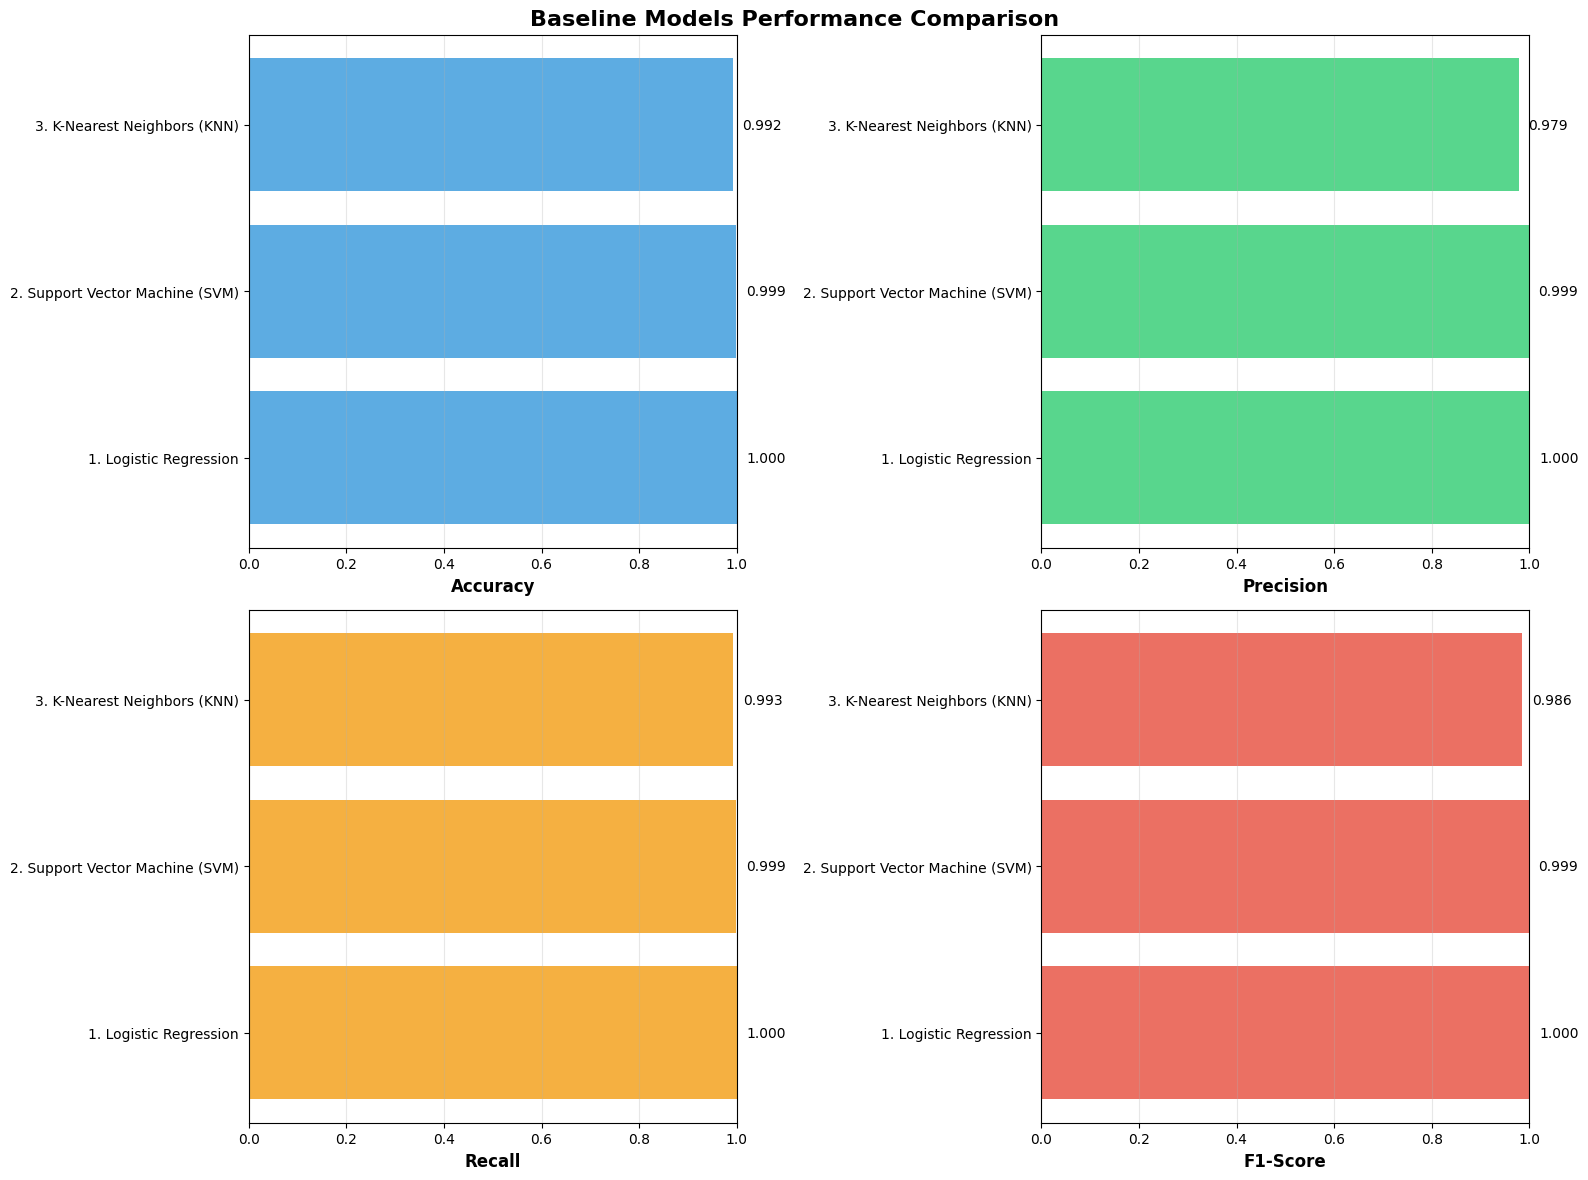

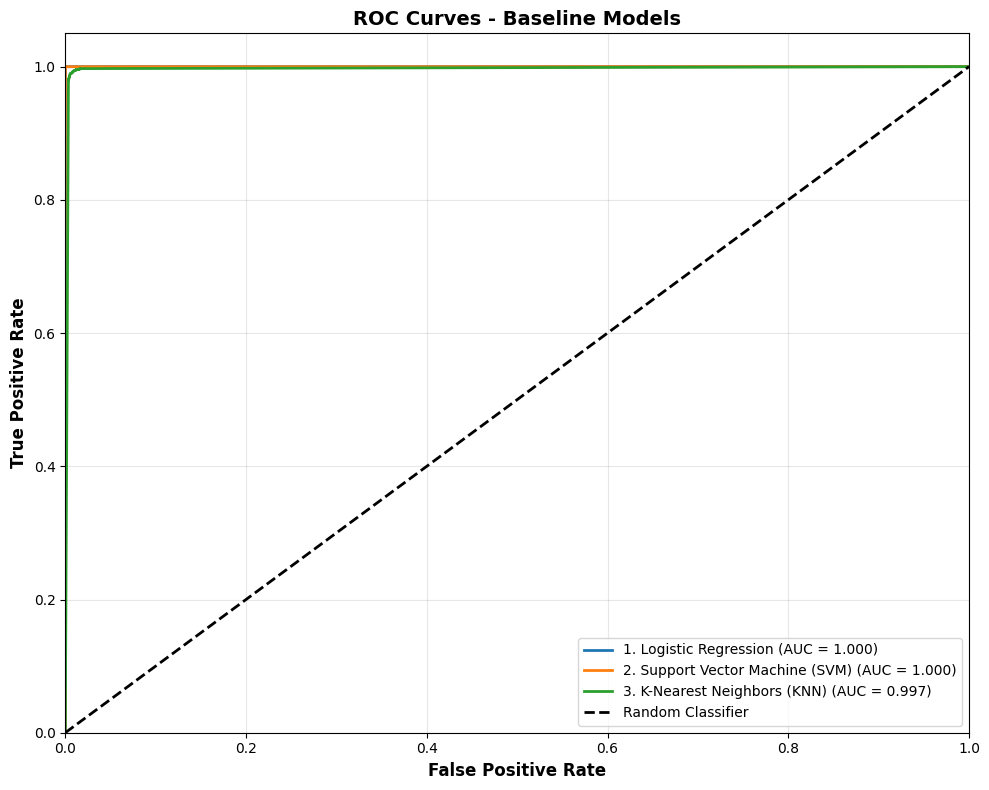

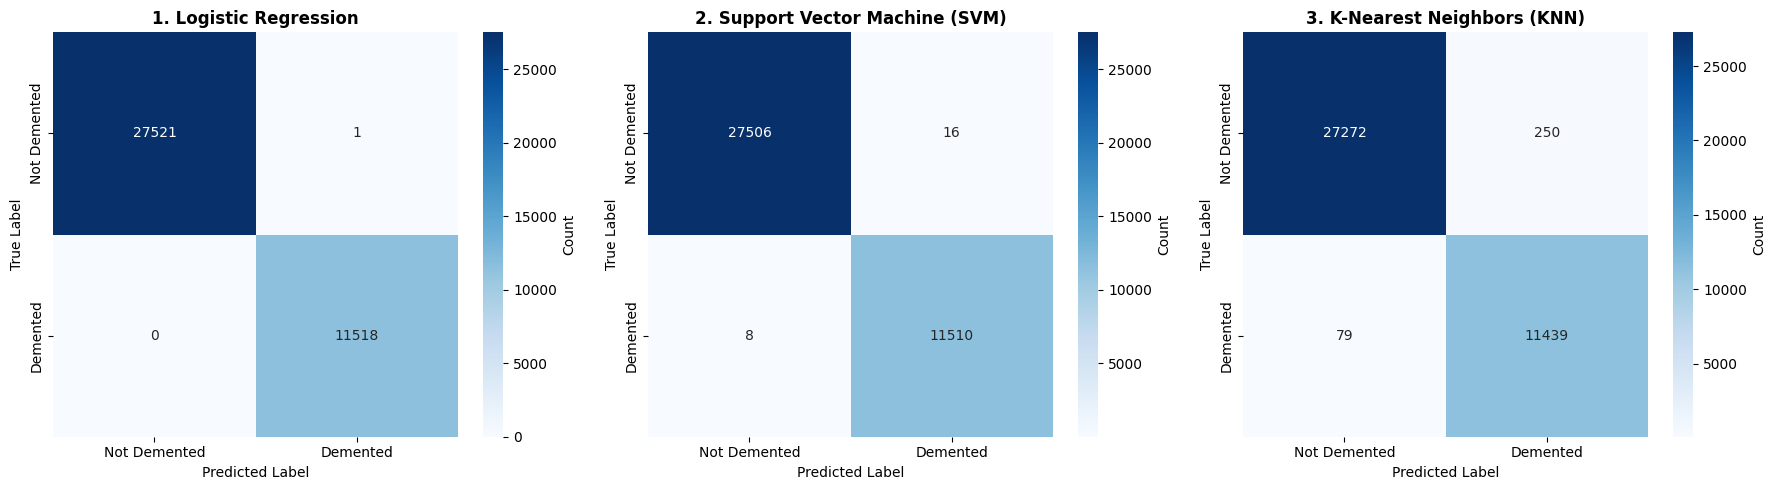

In [20]:
# ============================================================================
# VISUALIZATIONS
# ============================================================================

print(f"\n{'='*80}")
print("CREATING VISUALIZATIONS")
print("="*80)

# 1. Metrics Comparison Bar Chart
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Baseline Models Performance Comparison', fontsize=16, fontweight='bold')

metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
colors = ['#3498db', '#2ecc71', '#f39c12', '#e74c3c', '#9b59b6']

for idx, metric in enumerate(metrics_to_plot[:4]):
    ax = axes[idx // 2, idx % 2]
    bars = ax.barh(metrics_df['Model'], metrics_df[metric], color=colors[idx], alpha=0.8)
    ax.set_xlabel(metric, fontsize=12, fontweight='bold')
    ax.set_xlim(0, 1)
    ax.grid(axis='x', alpha=0.3)
    
    # Add value labels
    for i, bar in enumerate(bars):
        width = bar.get_width()
        ax.text(width + 0.02, bar.get_y() + bar.get_height()/2, 
                f'{width:.3f}', ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.savefig('results/plots/baseline_metrics_comparison.png', dpi=300, bbox_inches='tight')
print(f"✅ Saved: results/plots/baseline_metrics_comparison.png")

# 2. ROC Curves
plt.figure(figsize=(10, 8))
for model_name, result in results.items():
    fpr, tpr, _ = roc_curve(y_test, result['y_pred_proba'])
    roc_auc = result['metrics']['roc_auc']
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.3f})", linewidth=2)

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier', linewidth=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12, fontweight='bold')
plt.ylabel('True Positive Rate', fontsize=12, fontweight='bold')
plt.title('ROC Curves - Baseline Models', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('results/plots/baseline_roc_curves.png', dpi=300, bbox_inches='tight')
print(f"✅ Saved: results/plots/baseline_roc_curves.png")

# 3. Confusion Matrices
fig, axes = plt.subplots(1, len(results), figsize=(6*len(results), 5))
if len(results) == 1:
    axes = [axes]

for idx, (model_name, result) in enumerate(results.items()):
    cm = confusion_matrix(y_test, result['y_pred'])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx], 
                cbar_kws={'label': 'Count'})
    axes[idx].set_title(model_name, fontsize=12, fontweight='bold')
    axes[idx].set_ylabel('True Label', fontsize=10)
    axes[idx].set_xlabel('Predicted Label', fontsize=10)
    axes[idx].set_xticklabels(['Not Demented', 'Demented'])
    axes[idx].set_yticklabels(['Not Demented', 'Demented'])

plt.tight_layout()
plt.savefig('results/plots/baseline_confusion_matrices.png', dpi=300, bbox_inches='tight')
print(f"✅ Saved: results/plots/baseline_confusion_matrices.png")

print(f"\n{'='*80}")
print("✅ BASELINE MODEL TRAINING COMPLETE!")
print("="*80)
print(f"\n📁 All results saved in:")
print(f"   • models/baseline/")
print(f"   • results/metrics/")
print(f"   • results/plots/")